In [ ]:
#Nallely Lizbeth Serna Rivera	A00833111
#José Elias Plascencia Cruz 	A00832687
#Valeria Enríquez Limón			  A00832782
#Fernando Burgos			        A01236284

## Importamos todas las librerias necesarias

In [ ]:
!pip install gdown

In [ ]:
import pandas as pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Descargamos el dataset desde nuestro drive
###### Notar que no montamos el drive entero

In [ ]:
!gdown "https://drive.google.com/uc?id=1KQzhEfd67wevYXVPf9YHjK-bJKmwLeYR" #Orders
!gdown "https://drive.google.com/uc?id=1ZLWoRkKtZZbwPHB1gq-WNBpdJuRZE-_T" #Order_products_prior
!gdown "https://drive.google.com/uc?id=10puERgLpBU0RM1RA-Ua6vbYKJyJIXVbR" #Products
!gdown "https://drive.google.com/uc?id=1zLCNUUTpZcnygiJISx4Z44RawehbepZc" #Order_products_train
!gdown "https://drive.google.com/uc?id=1L4YGA0ccOmWoVnSKr6VKA9woNHndanSo" #Departments
!gdown "https://drive.google.com/uc?id=1mhg5JlTTUZ32qrzVQw5UJEITC7035Vuh" #Aisles

Downloading...
From (original): https://drive.google.com/uc?id=1KQzhEfd67wevYXVPf9YHjK-bJKmwLeYR
From (redirected): https://drive.google.com/uc?id=1KQzhEfd67wevYXVPf9YHjK-bJKmwLeYR&confirm=t&uuid=bbf26786-7664-4826-a4ae-25770968ad12
To: /content/orders.csv
100% 109M/109M [00:02<00:00, 43.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ZLWoRkKtZZbwPHB1gq-WNBpdJuRZE-_T
From (redirected): https://drive.google.com/uc?id=1ZLWoRkKtZZbwPHB1gq-WNBpdJuRZE-_T&confirm=t&uuid=c11e330a-1378-4dfa-9e6a-4251c1b06668
To: /content/order_products__prior.csv
100% 578M/578M [00:08<00:00, 68.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=10puERgLpBU0RM1RA-Ua6vbYKJyJIXVbR
To: /content/products.csv
100% 2.17M/2.17M [00:00<00:00, 17.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLCNUUTpZcnygiJISx4Z44RawehbepZc
To: /content/order_products__train.csv
100% 24.7M/24.7M [00:00<00:00, 44.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L4YGA0ccOmWoVnSKr6VKA

# Leemos los CSV y creamos los data frames

In [ ]:
Orders = pandas.pandas.read_csv("orders.csv")
Order_products_prior = pandas.read_csv("order_products__prior.csv")
Products = pandas.read_csv("products.csv")
Order_products_train = pandas.read_csv("order_products__train.csv")
Departments = pandas.read_csv("departments.csv")
Aisles = pandas.read_csv("aisles.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'orders.csv'

In [ ]:
datasets = {
    "Orders": Orders,
    "Order Products Prior": Order_products_prior,
    "Products": Products,
    "Order Products Train": Order_products_train,
    "Departments": Departments,
    "Aisles": Aisles
}

# Exploración de los datos

### Orders

In [ ]:
Orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
# Excluir columnas no numéricas
numeric_Orders = Orders.select_dtypes(include=[np.number])

# Calcular estadísticas descriptivas
stats = numeric_Orders.describe()

# Calcular la moda
mode_values = numeric_Orders.mode().iloc[0]

# Mediana
median_values = numeric_Orders.median()

# Desviación estándar
std_dev = numeric_Orders.std()

# Mostrar resultados
print("Estadísticas descriptivas:\n", stats)
print("\nModa:\n", mode_values)
print("\nMediana:\n", median_values)
print("\nDesviación estándar:\n", std_dev)


Estadísticas descriptivas:
            order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01     

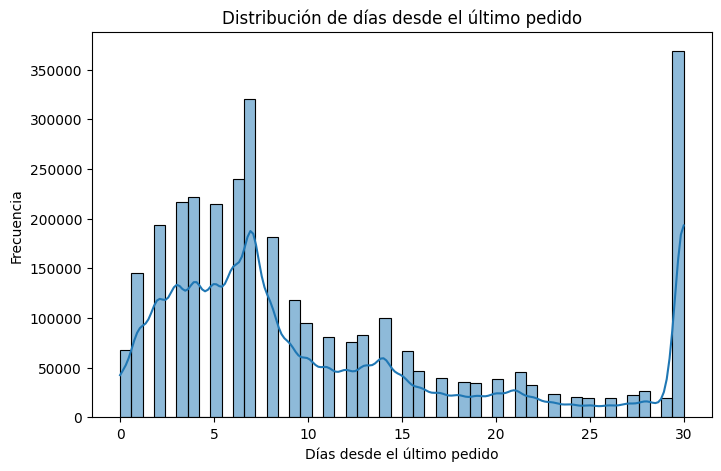

<ipython-input-8-3dad8beb8371>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dias_semana)  # Asignar nombres de los días en el eje X


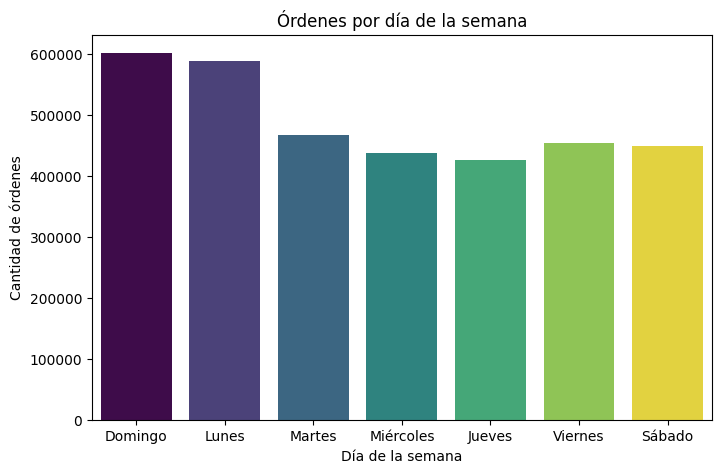

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Orders['days_since_prior_order'], bins=50, kde=True)
plt.title("Distribución de días desde el último pedido")
plt.xlabel("Días desde el último pedido")
plt.ylabel("Frecuencia")
plt.show()

dias_semana = ["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]

# Contar la cantidad de órdenes por día
order_counts = Orders['order_dow'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=order_counts.index, y=order_counts.values, hue=order_counts.index,
                 palette="viridis", legend=False)

# Configurar etiquetas y título
ax.set_xticklabels(dias_semana)  # Asignar nombres de los días en el eje X
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de órdenes")
plt.title("Órdenes por día de la semana")
plt.show()

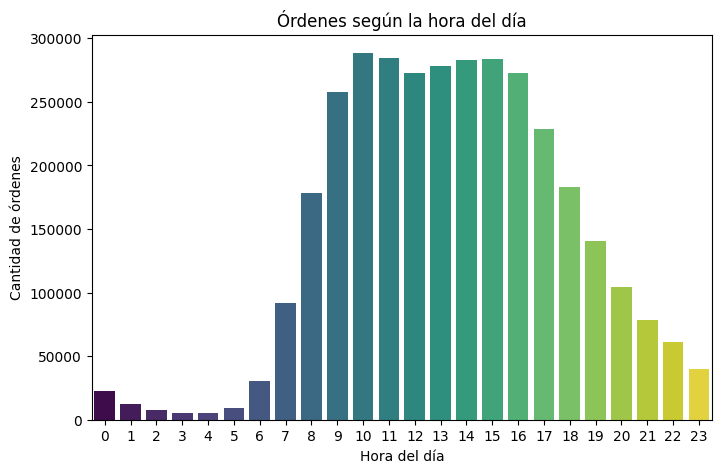

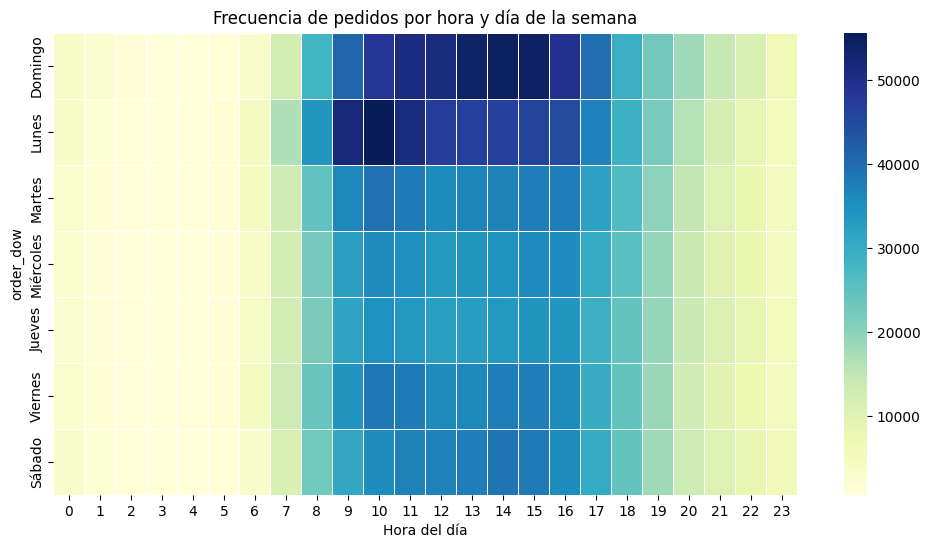

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=Orders, x='order_hour_of_day', hue = 'order_hour_of_day',
              palette='viridis', legend=False)
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de órdenes")
plt.title("Órdenes según la hora del día")
plt.show()

# Crear una tabla cruzada con el conteo de órdenes por día y hora
heatmap_data = Orders.pivot_table(index='order_dow', columns='order_hour_of_day',
                                  aggfunc='size', fill_value=0)

# Graficar el heatmap
plt.figure(figsize=(12, 6))
ax2 = sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Hora del día")
ax2.set_yticklabels(dias_semana)  # Asignar nombres de los días en el eje X

plt.title("Frecuencia de pedidos por hora y día de la semana")
plt.show()

### Order Products Prior

In [ ]:
Order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


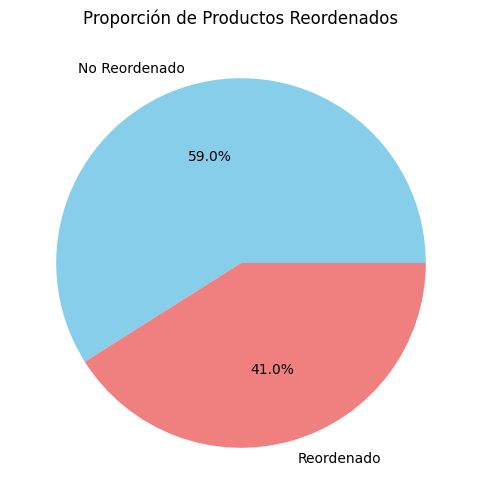

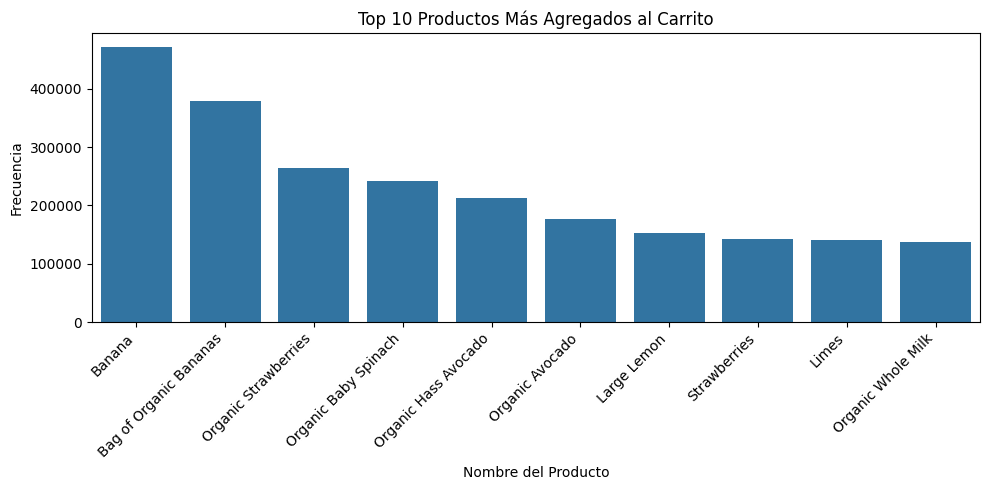

In [ ]:
reorder_counts = Order_products_prior["reordered"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(reorder_counts, labels=["No Reordenado", "Reordenado"], autopct='%1.1f%%', colors=["skyblue", "lightcoral"])
plt.title("Proporción de Productos Reordenados")
plt.show()


top_products = Order_products_prior["product_id"].value_counts().head(10)

top_products_with_names = pandas.merge(
    top_products.reset_index(), Products, on="product_id", how="left"
)

top_products_with_names.columns = ["product_id", "frequency", "product_name",
                                   "aisle_id", "department_id"]

plt.figure(figsize=(10, 5))
sns.barplot(x="product_name", y="frequency", data=top_products_with_names)
plt.title("Top 10 Productos Más Agregados al Carrito")
plt.xlabel("Nombre del Producto")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
Order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


### Products

In [ ]:
Products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<ipython-input-14-4eb2f22d0ff6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='count', data=dept_counts_df, palette="viridis")


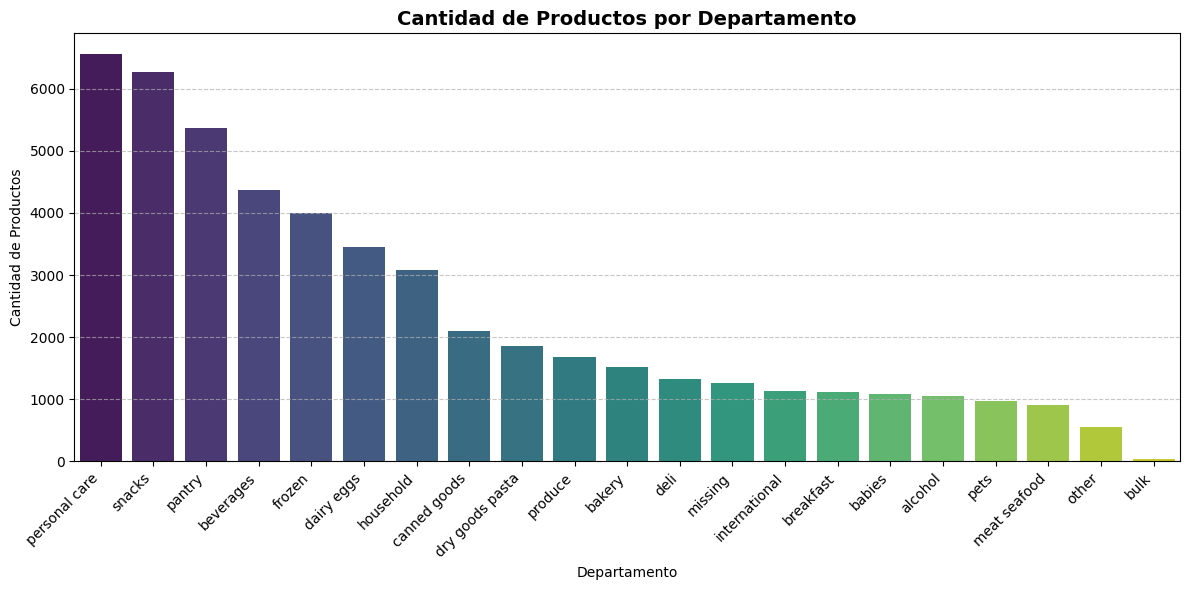

In [ ]:
# Calculate product counts per department
dept_counts = Products["department_id"].value_counts()

# Merge with Departments DataFrame to get department names
dept_counts_df = pandas.DataFrame({'department_id': dept_counts.index, 'count': dept_counts.values})
dept_counts_df = pandas.merge(dept_counts_df, Departments, on='department_id', how='left')

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='department', y='count', data=dept_counts_df, palette="viridis")
plt.title("Cantidad de Productos por Departamento", fontsize=14, fontweight="bold")
plt.xlabel("Departamento")
plt.ylabel("Cantidad de Productos")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


<ipython-input-15-75fd90e785a6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aisle', y='count', data=aisle_counts_df, palette="coolwarm")


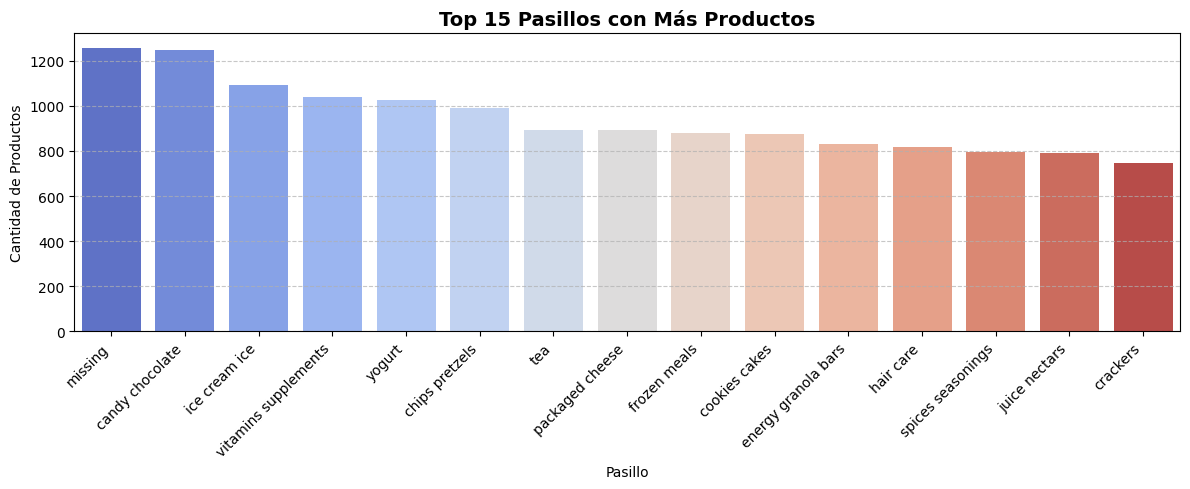

In [ ]:
# Calculate product counts per aisle and get top 15
aisle_counts = Products["aisle_id"].value_counts().head(15)

# Merge with Aisles DataFrame to get aisle names
aisle_counts_df = pandas.DataFrame({'aisle_id': aisle_counts.index, 'count': aisle_counts.values})
aisle_counts_df = pandas.merge(aisle_counts_df, Aisles, on='aisle_id', how='left')

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x='aisle', y='count', data=aisle_counts_df, palette="coolwarm")
plt.title("Top 15 Pasillos con Más Productos", fontsize=14, fontweight="bold")
plt.xlabel("Pasillo")  # Changed label to "Pasillo"
plt.ylabel("Cantidad de Productos")
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

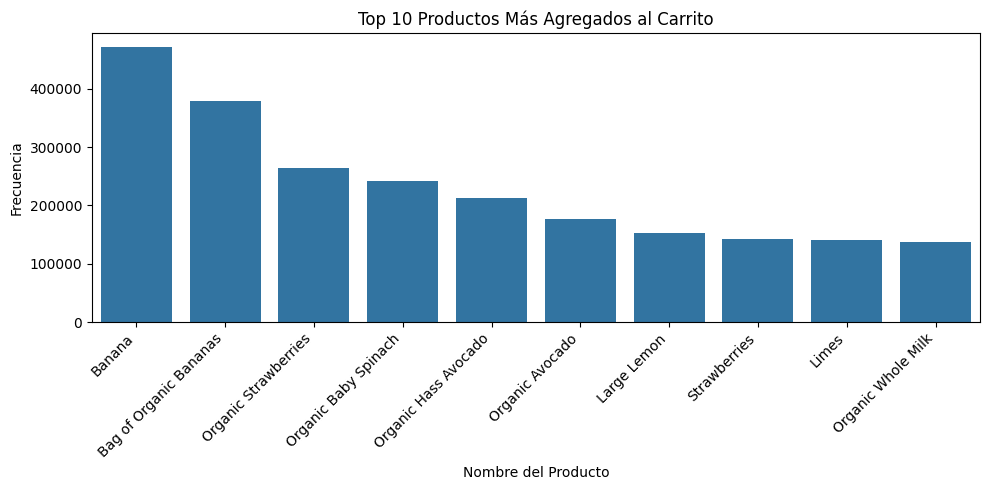

In [ ]:
top_products = Order_products_prior["product_id"].value_counts().head(10)

top_products_with_names = pandas.merge(
    top_products.reset_index(), Products, on="product_id", how="left"
)

top_products_with_names.columns = ["product_id", "frequency", "product_name",
                                   "aisle_id", "department_id"]

plt.figure(figsize=(10, 5))
sns.barplot(x="product_name", y="frequency", data=top_products_with_names)
plt.title("Top 10 Productos Más Agregados al Carrito")
plt.xlabel("Nombre del Producto")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

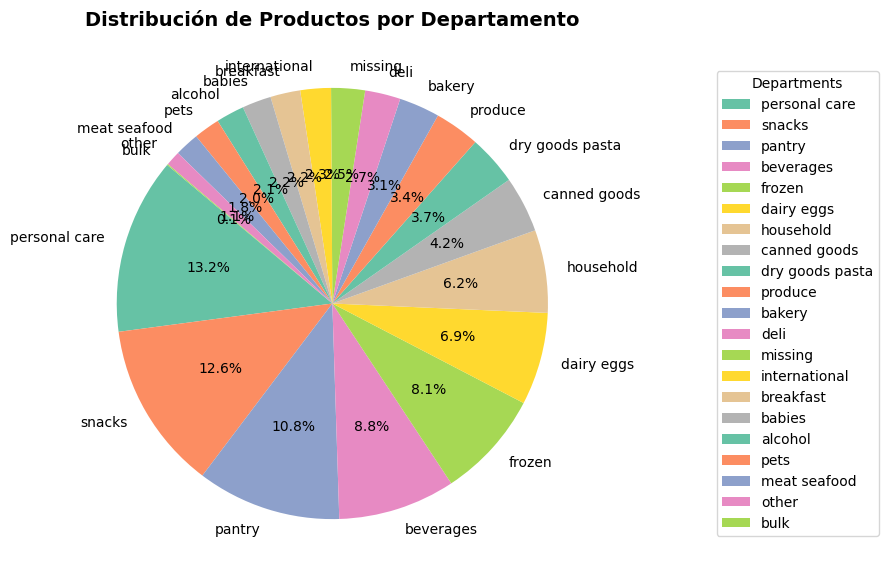

In [ ]:
dept_counts_with_names = Products["department_id"].value_counts()

dept_counts_with_names = pandas.merge(
    dept_counts.reset_index(), Departments, on="department_id", how="left"
)


plt.figure(figsize=(7, 7))
plt.pie(dept_counts, labels=dept_counts_with_names.department, autopct="%1.1f%%",
        colors=sns.color_palette("Set2"), startangle=140)
plt.title("Distribución de Productos por Departamento", fontsize=14, fontweight="bold")
plt.legend(
    dept_counts_with_names["department"],
    title="Departments",
    loc="center left",
    bbox_to_anchor=(1.2, 0, 0.5, 1)
)
plt.show()

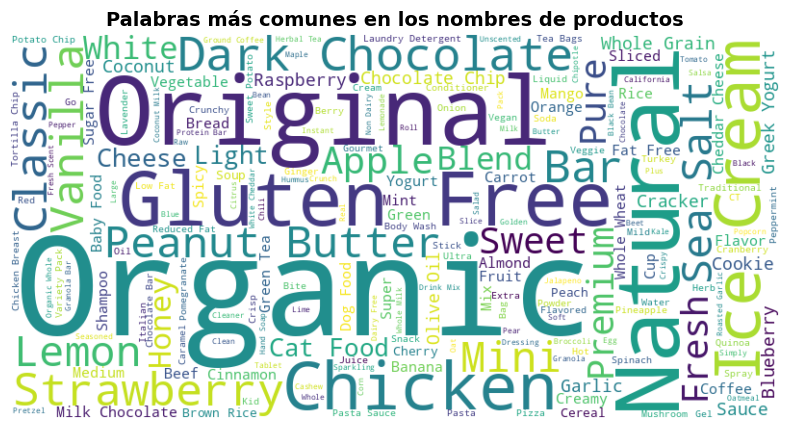

In [ ]:
from wordcloud import WordCloud

text = " ".join(Products["product_name"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más comunes en los nombres de productos", fontsize=14, fontweight="bold")
plt.show()


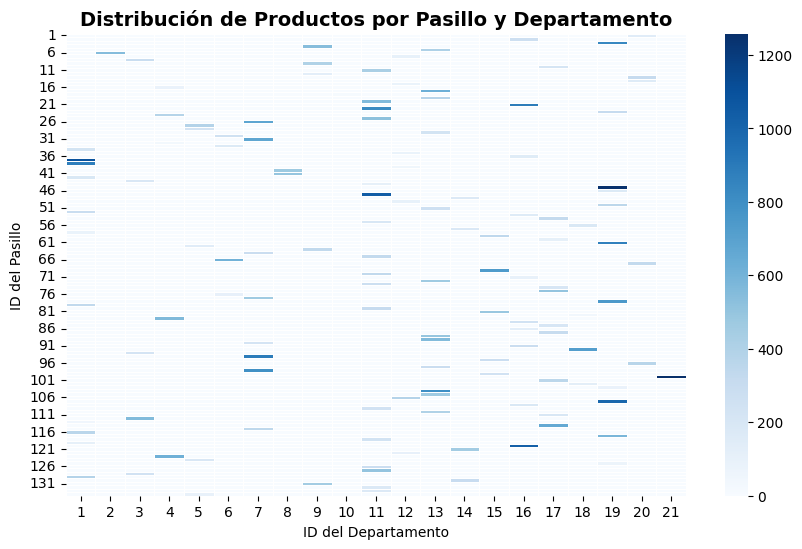

In [ ]:
plt.figure(figsize=(10, 6))
heatmap_data = Products.groupby(["aisle_id", "department_id"]).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5)
plt.title("Distribución de Productos por Pasillo y Departamento", fontsize=14, fontweight="bold")
plt.xlabel("ID del Departamento")
plt.ylabel("ID del Pasillo")
plt.show()


### Order Products Train

In [ ]:
Order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


<ipython-input-21-94a155742ffb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=Order_products_train, x="reordered", discrete=True, bins=2, palette=["#FF6F61", "#6B8E23"])


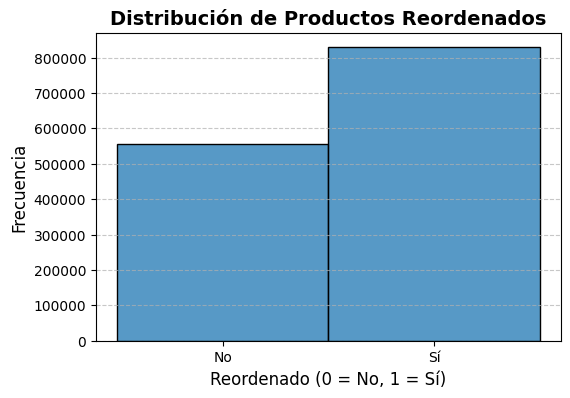

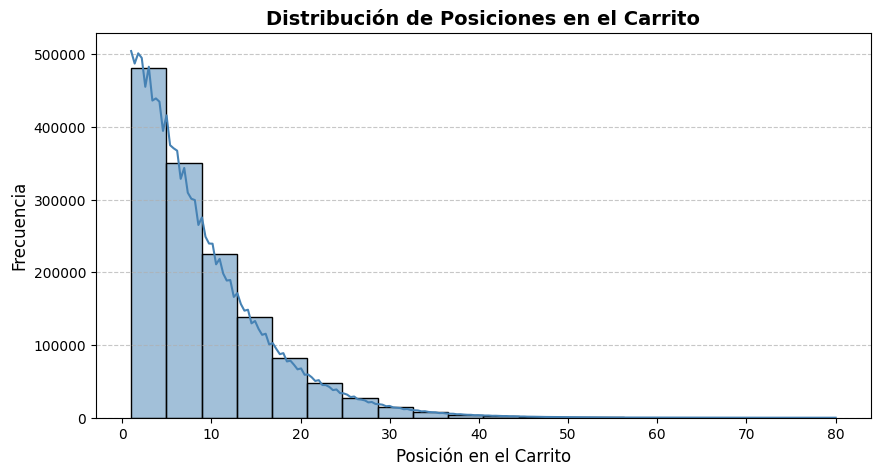

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=Order_products_train, x="reordered", discrete=True, bins=2, palette=["#FF6F61", "#6B8E23"])
plt.title("Distribución de Productos Reordenados", fontsize=14, fontweight="bold")
plt.xlabel("Reordenado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks([0, 1], ["No", "Sí"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(Order_products_train["add_to_cart_order"], bins=20, kde=True, color="#4682B4")
plt.title("Distribución de Posiciones en el Carrito", fontsize=14, fontweight="bold")
plt.xlabel("Posición en el Carrito", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


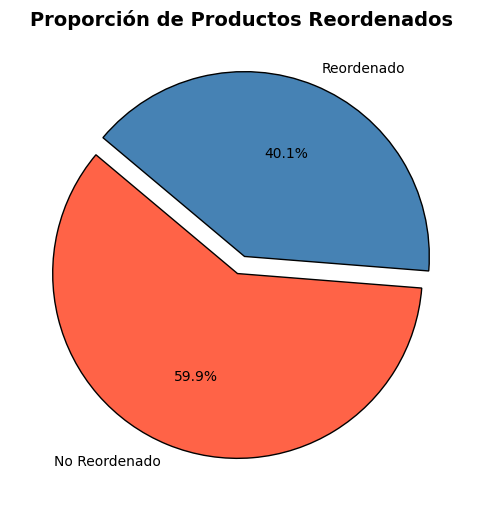

In [ ]:
reorder_counts = Order_products_train["reordered"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(reorder_counts, labels=["No Reordenado", "Reordenado"], autopct='%1.1f%%',
        colors=["#FF6347", "#4682B4"], explode=[0.05, 0.05], startangle=140,
        wedgeprops={'edgecolor': 'black'})

plt.title("Proporción de Productos Reordenados", fontsize=14, fontweight="bold")
plt.show()

### Departments

In [ ]:
Departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


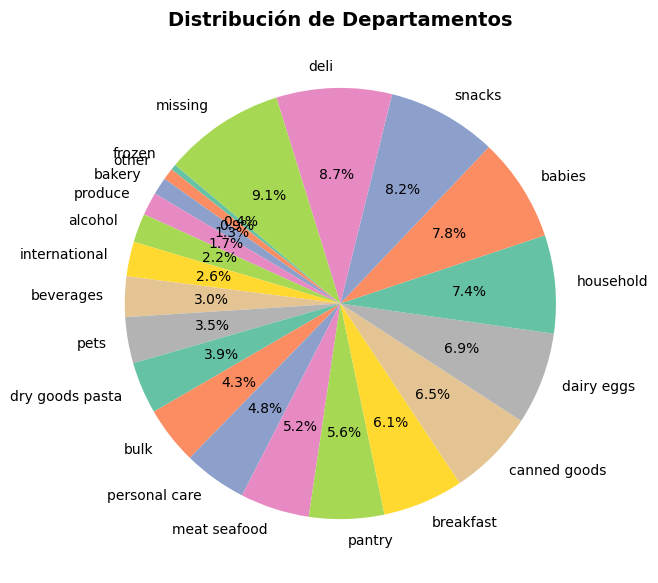

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(Departments["department_id"], labels=Departments["department"], autopct="%1.1f%%",
        colors=sns.color_palette("Set2"), startangle=140)
plt.title("Distribución de Departamentos", fontsize=14, fontweight="bold")
plt.show()


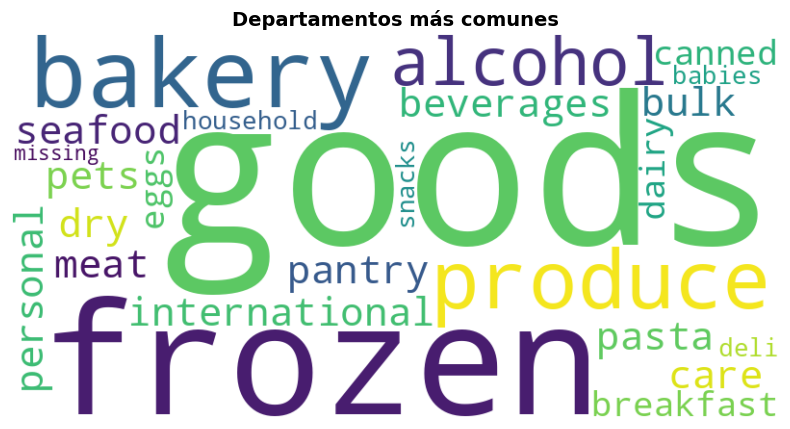

In [ ]:
text = " ".join(Departments["department"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Departamentos más comunes", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
Aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
# Diccionario con los nombres de los archivos
file_names = ["orders.csv", "order_products__prior.csv", "products.csv",
              "order_products__train.csv", "departments.csv", "aisles.csv"]

# Contar filas de cada archivo
for file in file_names:
    df = pandas.read_csv(file)
    print(f"{file}: {df.shape[0]} registros")


orders.csv: 3421083 registros
order_products__prior.csv: 32434489 registros
products.csv: 49688 registros
order_products__train.csv: 1384617 registros
departments.csv: 21 registros
aisles.csv: 134 registros


Análisis de correlaciones:

<ipython-input-28-13c882d3543e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_counts, x="department", y="total_orders", palette="viridis")


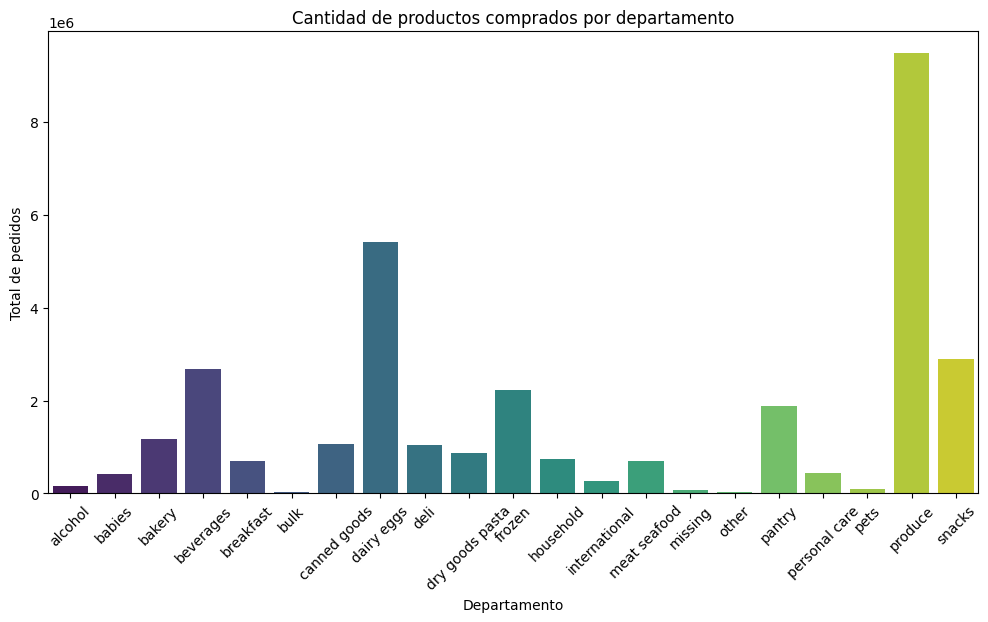

In [ ]:
import gc

# Cargar archivos con columnas clave
departments = pd.read_csv("departments.csv", usecols=["department_id", "department"])
products = pd.read_csv("products.csv", usecols=["product_id", "department_id", "product_name"])
order_products_prior = pd.read_csv("order_products__prior.csv", usecols=["order_id", "product_id"])
orders = pd.read_csv("orders.csv", usecols=["order_id", "user_id"])

# Merge: Agregar nombre de departamento a los productos
products = products.merge(departments, on="department_id", how="left")

# Merge: Asociar productos con órdenes
orders_products = order_products_prior.merge(products, on="product_id", how="left")

# Merge: Relacionar con órdenes para ver usuarios
final_df = orders_products.merge(orders, on="order_id", how="left")

# Liberar memoria
del departments, order_products_prior, orders
gc.collect()

# Agrupar para ver cuántos productos de cada departamento fueron comprados
dept_counts = final_df.groupby("department")["order_id"].count().reset_index()
dept_counts = dept_counts.rename(columns={"order_id": "total_orders"})

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=dept_counts, x="department", y="total_orders", palette="viridis")
plt.xticks(rotation=45)
plt.title("Cantidad de productos comprados por departamento")
plt.xlabel("Departamento")
plt.ylabel("Total de pedidos")
plt.show()


#### Correlation

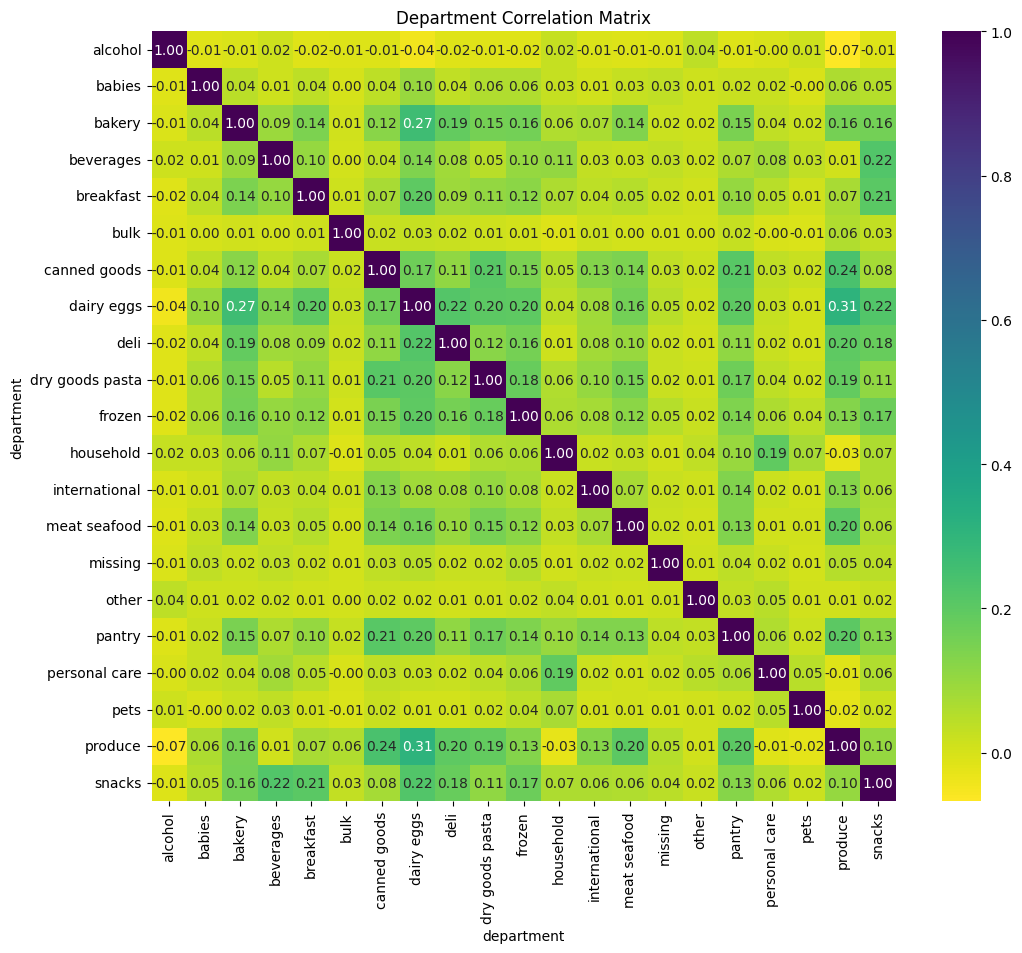

In [ ]:
# Load necessary dataframes

"""
orders = pd.read_csv("orders.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
products = pd.read_csv("products.csv")
departments = pd.read_csv("departments.csv")
"""

# Merge dataframes to link departments to orders
order_products = pd.merge(Order_products_prior, Products, on="product_id")
order_dept = pd.merge(order_products, Departments, on="department_id")
order_dept = pd.merge(order_dept, Orders, on="order_id")

# Create a co-occurrence matrix
dept_cooccurrence = pd.crosstab(order_dept['order_id'], order_dept['department'])

# Calculate the correlation matrix
dept_correlation = dept_cooccurrence.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dept_correlation, annot=True, cmap="viridis_r", fmt=".2f")
plt.title("Department Correlation Matrix")
plt.show()

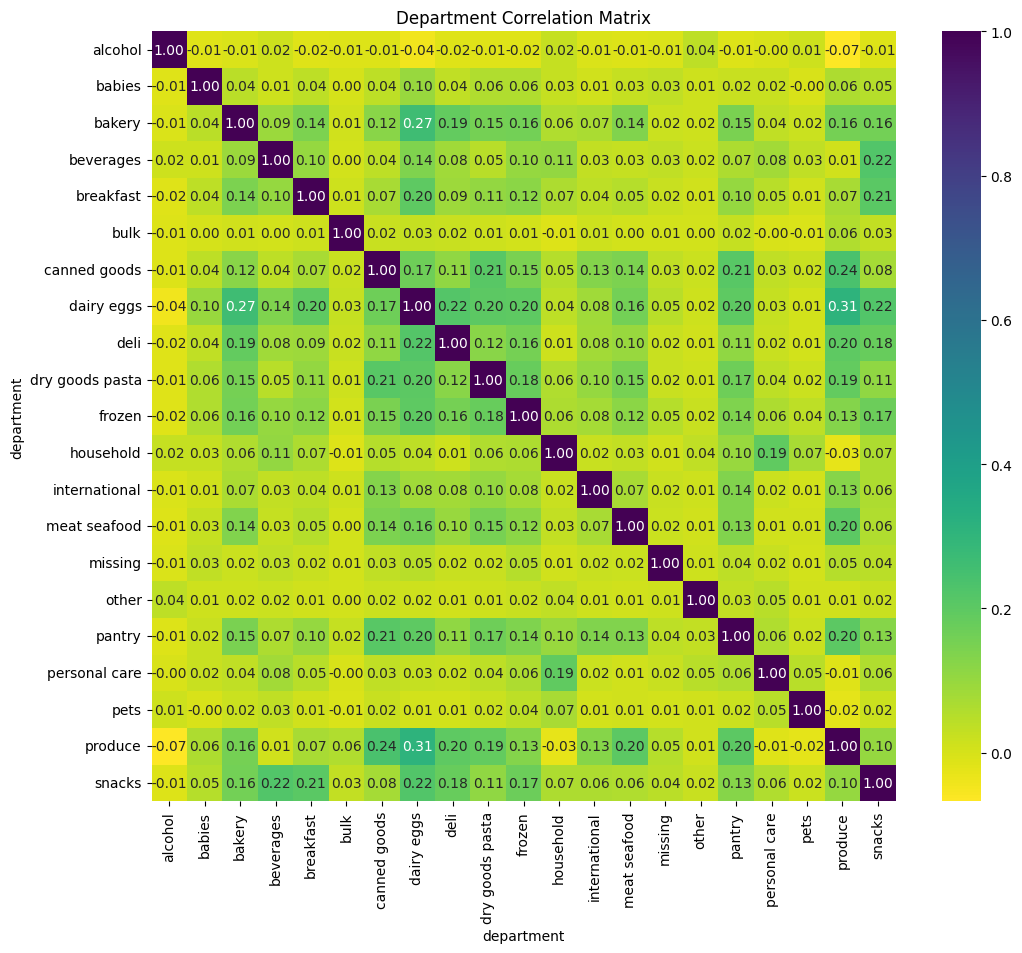

In [ ]:
# Primero unimos productos con departamentos (más pequeño)
products_dept = Products.merge(Departments, on="department_id", how="left")

# Luego unimos con order_products_prior (reduce duplicación)
order_dept = Order_products_prior.merge(products_dept, on="product_id", how="left")

# Finalmente unimos con orders
order_dept = order_dept.merge(Orders, on="order_id", how="left")

dept_cooccurrence = order_dept.pivot_table(index="order_id", columns="department", aggfunc="size", fill_value=0)

dept_cooccurrence = dept_cooccurrence.astype(pd.SparseDtype("int", fill_value=0))
dept_correlation = dept_cooccurrence.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(dept_correlation, annot=True, cmap="viridis_r", fmt=".2f")
plt.title("Department Correlation Matrix")
plt.show()


In [ ]:
# Agrupar productos por orden en listas
basket = order_dept.groupby("order_id")["product_id"].apply(list)
basket = basket.tolist()  # Convertir a listas

In [ ]:
basket = order_dept.groupby("order_id")["product_name"].apply(list).tolist()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Codificar transacciones en formato booleano
te = TransactionEncoder()
basket_encoded = te.fit_transform(basket)
df_basket = pd.DataFrame(basket_encoded, columns=te.columns_)

# Aplicar Apriori para encontrar conjuntos de productos frecuentes
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)

# Extraer reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Mostrar las reglas más interesantes
rules.sort_values("lift", ascending=False).head(10)

In [ ]:
import networkx as nx

# Crear un grafo con las reglas
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(str(row["antecedents"]), str(row["consequents"]), weight=row["lift"])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]
nx.draw(G, pos, with_labels=True, edge_color=weights, edge_cmap=plt.cm.viridis, node_color='lightblue', node_size=3000)
plt.title("Network of Product Associations")
plt.show()

In [ ]:

orders = datasets["Orders"]
order_products_prior = datasets["Order Products Prior"]
products = datasets["Products"]
departments = datasets["Departments"]


# Merge dataframes to link departments to orders
order_products = pd.merge(order_products_prior, products, on="product_id")
order_dept = pd.merge(order_products, departments, on="department_id")
order_dept = pd.merge(order_dept, orders, on="order_id")

# Create a co-occurrence matrix
dept_cooccurrence = pd.crosstab(order_dept['order_id'], order_dept['department'])

# Calculate the correlation matrix
dept_correlation = dept_cooccurrence.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dept_correlation, annot=True, cmap="viridis_r", fmt=".2f")
plt.title("Department Correlation Matrix")
plt.show()

# Product Affinity Analysis (example)
# Find frequently bought together products within the same order.
product_cooccurrence = pd.crosstab(order_products_prior['order_id'], order_products_prior['product_id'])
product_affinity = product_cooccurrence.T.dot(product_cooccurrence)
# ... (Further analysis of product_affinity matrix)


In [ ]:
OrderedProducts_df = pandas.merge(Products, Order_products_train, on='product_id', how='inner')

ProductsWithDepartment_df = pandas.merge(OrderedProducts_df, Departments, on='department_id', how='inner')


department_order_ids = ProductsWithDepartment_df.groupby('department')['order_id'].unique().reset_index()

# Calculate the count of unique orders for each department
department_order_ids['count'] = department_order_ids['order_id'].apply(len)

# Display the results
department_order_ids = department_order_ids.sort_values(by='count', ascending=False)
print(department_order_ids[['department', 'count']])
# produce department is the one with most product sold according to order_products_train

# Calculate the order ids with at least one produce product in the order
produce_orders = ProductsWithDepartment_df[ProductsWithDepartment_df['department'] == 'produce']
produce_order_ids = produce_orders['order_id'].unique()

# Filter the whole products ordered that have an oder id with one produce product, then remove produce department
filteredProductsWithProduce_df = ProductsWithDepartment_df[ProductsWithDepartment_df['order_id'].isin(produce_order_ids)]
filteredProductsWithoutProduce_df = filteredProductsWithProduce_df[filteredProductsWithProduce_df['department'] != 'produce']
# Finally get the most common second department with which the produce products are sold
department_counts = filteredProductsWithoutProduce_df['department'].value_counts()
most_common_department = department_counts.idxmax()

print(f"The most common department bought with produce is: {most_common_department}")

In [ ]:
print(department_order_ids)